## Practica#8: Forecasting

El forecasting es una herramienta que se utiliza para predecir la demanda futura de un producto o servicio mediante el análisis de datos históricos y el uso de técnicas estadísticas y matemáticas. 


**K-medias** es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano. 

In [1]:
##importamos librerias
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv(r'C:\Users\Acer\Desktop\trabajos facu\7mo semestre\AYDR_Tareas_MineriaDeDatos\csv\steam_limpio.csv'
, encoding='latin-1')      #recordar poner la direccion del csv steam_limpio.csv


In [3]:
# Asegurarse de que la columna de fecha esté en formato datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Limpiar datos: Eliminar registros con valores nulos
df = df.dropna(subset=['price', 'average_playtime', 'negative_ratings', 'release_date'])

# Seleccionar variables para el clustering (por ejemplo, 'price', 'average_playtime', 'negative_ratings')
variables_independientes = ['price', 'average_playtime', 'negative_ratings']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[variables_independientes])

# Aplicar k-Means (por ejemplo, 3 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Ver los centros de los clusters
centroids = kmeans.cluster_centers_
print("Centros de los Clusters:")
print(centroids)

Centros de los Clusters:
[[-2.03673399e-02 -2.05385885e-02 -2.81999030e-02]
 [ 1.64172087e+00  4.55831142e+01  1.21160702e-02]
 [-6.54147530e-01  1.68579509e+01  6.90384588e+01]
 [ 2.21877016e+01  6.88036600e-02 -8.94526458e-02]
 [ 1.92594934e+00  4.18393111e+00  1.67678945e+01]]


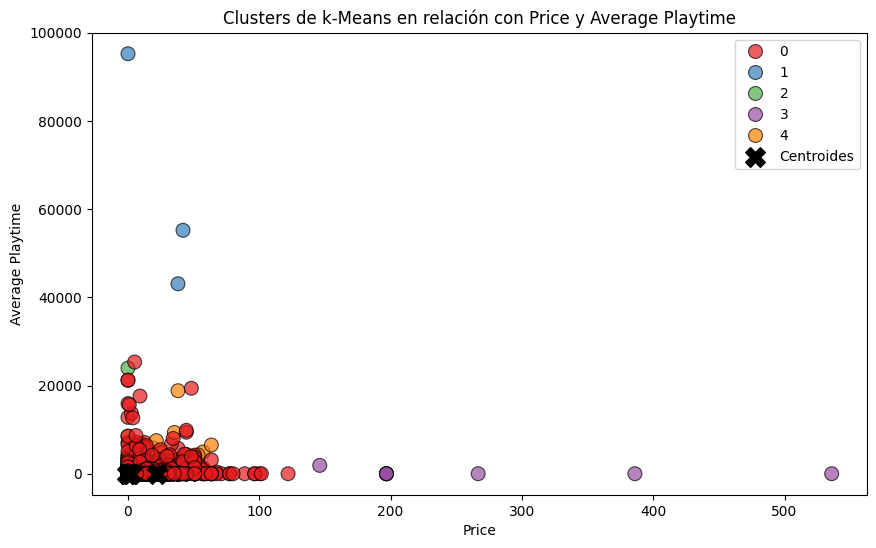

In [4]:
# Visualización de los clusters con respecto a 'price' y 'average_playtime'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['price'], y=df['average_playtime'], hue=df['Cluster'], palette='Set1', s=100, alpha=0.7, edgecolor='black')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroides')
plt.title("Clusters de k-Means en relación con Price y Average Playtime")
plt.xlabel("Price")
plt.ylabel("Average Playtime")
plt.legend()
plt.show()

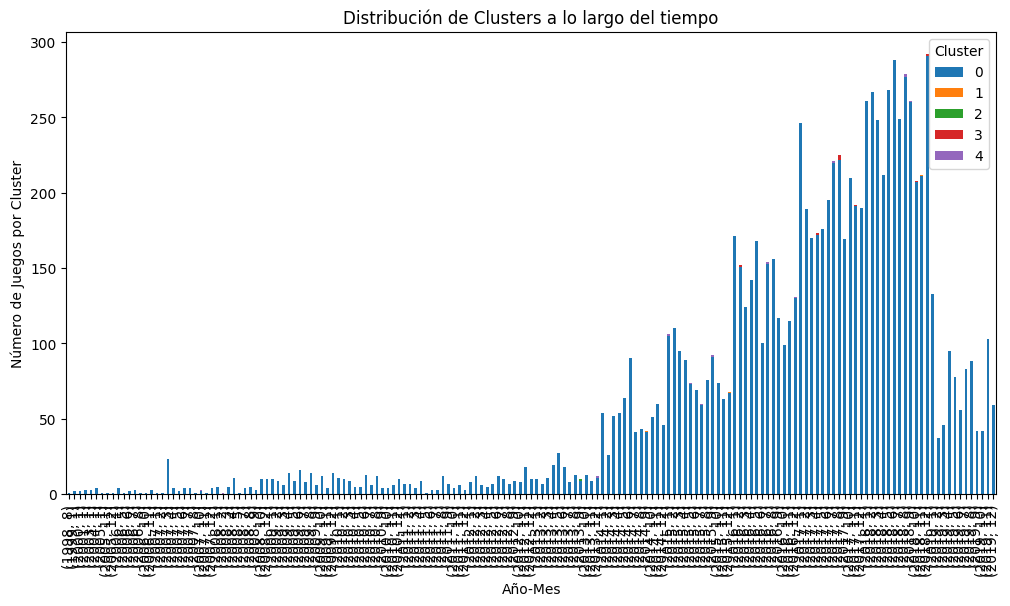

In [5]:
# Analizar la tendencia en el tiempo (por ejemplo, utilizando la columna 'release_date')
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month

# Agrupar los datos por año y mes para ver la evolución de los clusters
monthly_clusters = df.groupby(['year', 'month', 'Cluster']).size().unstack(fill_value=0)

# Mostrar cómo evolucionan los clusters a lo largo del tiempo
monthly_clusters.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Distribución de Clusters a lo largo del tiempo")
plt.xlabel("Año-Mes")
plt.ylabel("Número de Juegos por Cluster")
plt.show()